  ATTRIBUTE                         WETLAND_TY     ACRES   Shape_Leng  \
0     PSS2J  Freshwater Forested/Shrub Wetland  2.234404   796.298112   
1     PSS2J  Freshwater Forested/Shrub Wetland  0.003006    23.025731   
2     PSS2J  Freshwater Forested/Shrub Wetland  2.950182   840.274207   
3     R4SBC                           Riverine  1.791979  2437.847593   
4     R4SBC                           Riverine  1.860741  2532.691055   

     Shape_Area                                           geometry  
0   9042.310382  POLYGON ((-1148062.503 1596413.703, -1148062.0...  
1     12.164746  POLYGON ((-1148207.579 1596494.041, -1148200.0...  
2  11938.961558  POLYGON ((-1148010.118 1596476.379, -1148013.4...  
3   7251.881557  POLYGON ((-1151927.027 1572267.307, -1151899.6...  
4   7530.151014  POLYGON ((-1152181.478 1574453.969, -1152180.9...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189596 entries, 0 to 189595
Data columns (total 6 columns):
 #   Column      Non-Null Cou

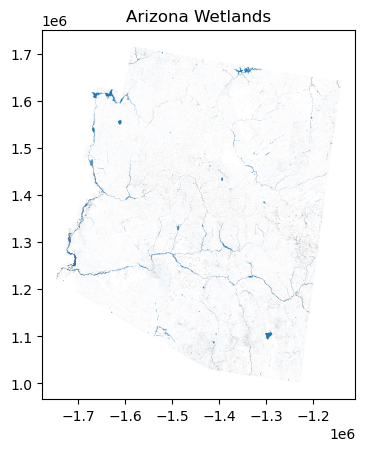

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the AZ_Wetlands shapefile
shapefile_path = '/scratch/kdahal3/extracted_shapefile/AZ_shapefile_wetlands/AZ_Wetlands.shp'

# Reading the shapefile
gdf = gpd.read_file(shapefile_path)

# Print some basic information about the data
print(gdf.head())
print(gdf.info())

# Plotting
gdf.plot()
plt.title("Arizona Wetlands")
plt.show()


In [1]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin

# Read the shapefile
shapefile_path = '/scratch/kdahal3/extracted_shapefile/AZ_shapefile_wetlands/AZ_Wetlands.shp'
gdf = gpd.read_file(shapefile_path)

# Determine the bounds of your dataset
bounds = gdf.total_bounds  # [minx, miny, maxx, maxy]
cell_size = 1000  # cell size for 1 km raster

# Calculate the number of rows and columns
num_col = int((bounds[2] - bounds[0]) / cell_size)
num_row = int((bounds[3] - bounds[1]) / cell_size)

# Create an affine transform for the raster
transform = from_origin(bounds[0], bounds[3], cell_size, cell_size)

# Function to burn shapes into a raster
def burn_shapes(shapes, value):
    return rasterize(shapes, out_shape=(num_row, num_col), fill=2, default_value=value, transform=transform)

# Burn the geometry
rasterized = burn_shapes(gdf.geometry, 1)

# Create a new raster file with the rasterized data
with rasterio.open(
    'AZ_wetlands_raster.tif',
    'w',
    driver='GTiff',
    height=rasterized.shape[0],
    width=rasterized.shape[1],
    count=1,
    dtype=rasterized.dtype,
    crs=gdf.crs,
    transform=transform,
) as dst:
    dst.write(rasterized, 1)


ERROR 1: PROJ: proj_create_from_database: Open of /home/kdahal3/.conda/envs/gdal/share/proj failed


In [2]:
import geopandas as gpd

# Read the shapefile
shapefile_path = '/scratch/kdahal3/extracted_shapefile/AZ_shapefile_wetlands/AZ_Wetlands.shp'
gdf = gpd.read_file(shapefile_path)

# Print the CRS of the shapefile
print("CRS of the shapefile:", gdf.crs)

CRS of the shapefile: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [3]:
import rasterio

# Path to the raster file
raster_file_path = '/scratch/kdahal3/wetland/wetlands_raster.tif'

# Open the raster file
with rasterio.open(raster_file_path) as src:
    # Print the CRS of the raster file
    print("CRS of the raster file:", src.crs)


CRS of the raster file: EPSG:5070


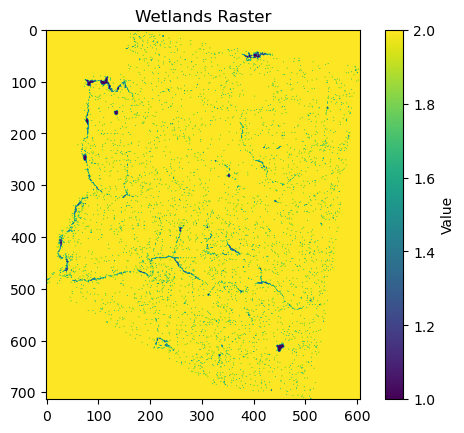

In [2]:
import rasterio
import matplotlib.pyplot as plt

# Path to the raster file
raster_file_path = '/scratch/kdahal3/wetland/AZ_wetlands_raster.tif'

# Open the raster file
with rasterio.open(raster_file_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Reading the first band

    # Plot the raster data
    plt.imshow(raster_data, cmap='viridis')
    plt.colorbar(label='Value')
    plt.title("Wetlands Raster")
    plt.show()


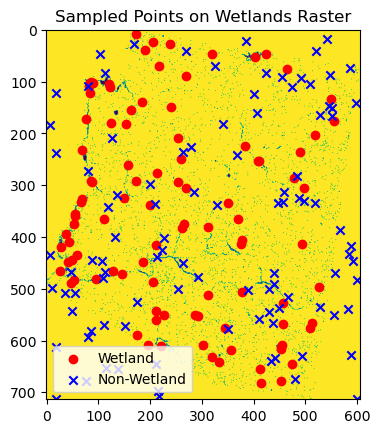

In [6]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Path to the raster file
raster_file_path = '/scratch/kdahal3/wetland/wetlands_raster.tif'

# Open the raster file
with rasterio.open(raster_file_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Reading the first band

    # Find all pixels with value 1 (wetland) and 2 (not wetland)
    wetland_pixels = np.where(raster_data == 1)
    non_wetland_pixels = np.where(raster_data == 2)

    # Randomly sample 100 points from each category
    sampled_wetland_indices = np.random.choice(len(wetland_pixels[0]), 100, replace=False)
    sampled_non_wetland_indices = np.random.choice(len(non_wetland_pixels[0]), 100, replace=False)

    sampled_wetland_coords = [(wetland_pixels[1][i], wetland_pixels[0][i]) for i in sampled_wetland_indices]
    sampled_non_wetland_coords = [(non_wetland_pixels[1][i], non_wetland_pixels[0][i]) for i in sampled_non_wetland_indices]

    # Plot the raster data
    plt.imshow(raster_data, cmap='viridis')
    # plt.colorbar(label='Value')

    # Plot the sampled points
    wetland_x, wetland_y = zip(*sampled_wetland_coords)
    non_wetland_x, non_wetland_y = zip(*sampled_non_wetland_coords)

    plt.scatter(wetland_x, wetland_y, c='red', label='Wetland', marker='o')
    plt.scatter(non_wetland_x, non_wetland_y, c='blue', label='Non-Wetland', marker='x')

    plt.title("Sampled Points on Wetlands Raster")
    plt.legend()
    plt.show()


In [3]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import csv

raster_file_path = '/scratch/kdahal3/wetland/AZ_wetlands_raster.tif'

# Initialize lists to store sampled coordinates
sampled_wetland_coords = []
sampled_non_wetland_coords = []

# Open the raster file
with rasterio.open(raster_file_path) as src:
    # Determine the size of each window (batch)
    window_size = 10000  # For example, 1000x1000 pixels

    # Counter for windows processed
    window_counter = 0

    # Loop over the raster in windows
    for ji, window in src.block_windows(1):
        window_counter += 1
        print(f"Processing window {window_counter}")

        # Read the data in the current window
        raster_data = src.read(1, window=window)

        # Find all pixels with value 1 (wetland) and 2 (not wetland)
        wetland_pixels = np.where(raster_data == 1)
        non_wetland_pixels = np.where(raster_data == 2)

        # Sample points
        sampled_wetland_indices = np.random.choice(len(wetland_pixels[0]), min(5, len(wetland_pixels[0])), replace=False)
        sampled_non_wetland_indices = np.random.choice(len(non_wetland_pixels[0]), min(5, len(non_wetland_pixels[0])), replace=False)

        for i in sampled_wetland_indices:
            coord = (wetland_pixels[1][i] + window.col_off, wetland_pixels[0][i] + window.row_off)
            sampled_wetland_coords.append(coord)

        for i in sampled_non_wetland_indices:
            coord = (non_wetland_pixels[1][i] + window.col_off, non_wetland_pixels[0][i] + window.row_off)
            sampled_non_wetland_coords.append(coord)

    # Print total number of sampled points
    print(f"Total sampled wetland points: {len(sampled_wetland_coords)}")
    print(f"Total sampled non-wetland points: {len(sampled_non_wetland_coords)}")

# Convert pixel coordinates to geographic coordinates and save to CSV
csv_file_path = "/scratch/kdahal3/wetland/AZ_sampled_coords.csv"
with open(csv_file_path, mode="w", newline='') as file:
    writer = csv.writer(file)
    
    # Write headers
    writer.writerow(["Type", "Longitude", "Latitude"])

    # Function to convert pixel coordinates to geographic coordinates
    def get_geocoords(row, col, affine_transform):
        return affine_transform * (col, row)

    # Write wetland coordinates
    for coord in sampled_wetland_coords:
        geo_coord = get_geocoords(coord[1], coord[0], src.transform)
        writer.writerow(["Wetland", geo_coord[0], geo_coord[1]])

    # Write non-wetland coordinates
    for coord in sampled_non_wetland_coords:
        geo_coord = get_geocoords(coord[1], coord[0], src.transform)
        writer.writerow(["Non-Wetland", geo_coord[0], geo_coord[1]])

print(f"Sampled coordinates saved to {csv_file_path}")

Processing window 1
Processing window 2
Processing window 3
Processing window 4
Processing window 5
Processing window 6
Processing window 7
Processing window 8
Processing window 9
Processing window 10
Processing window 11
Processing window 12
Processing window 13
Processing window 14
Processing window 15
Processing window 16
Processing window 17
Processing window 18
Processing window 19
Processing window 20
Processing window 21
Processing window 22
Processing window 23
Processing window 24
Processing window 25
Processing window 26
Processing window 27
Processing window 28
Processing window 29
Processing window 30
Processing window 31
Processing window 32
Processing window 33
Processing window 34
Processing window 35
Processing window 36
Processing window 37
Processing window 38
Processing window 39
Processing window 40
Processing window 41
Processing window 42
Processing window 43
Processing window 44
Processing window 45
Processing window 46
Processing window 47
Processing window 48
P

### Lets see the results

In [13]:
import pandas as pd


myPoints = pd.read_csv('/scratch/kdahal3/wetland/sampled_coords.csv')

myPoints.count()

Type         714172
Longitude    714172
Latitude     714172
dtype: int64

## Lets combine CSVs to upload in GEE

In [2]:
import pandas as pd
import os

# Directory where the CSV files are stored
directory = '/scratch/kdahal3/wetland'
all_files = os.listdir(directory)

# List to hold data from all CSV files
all_data = []

for filename in all_files:
    if filename.endswith('.csv'):
        state_code = filename.split('_')[0]  # Extract state code from the filename
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df['State'] = state_code  # Add the state code as a new column
        all_data.append(df)

# Concatenate all dataframes
combined_df = pd.concat(all_data, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('/scratch/kdahal3/wetland/combined_states_data.csv', index=False)


In [3]:
combined_df.shape

(26047924, 4)

## Check State files

In [1]:
import os

# Path to the directory containing the files
directory_path = "/scratch/kdahal3/wetland"

# List all files and directories in the specified directory
all_files = os.listdir(directory_path)

# Dictionary to hold the file types for each state
state_files = {}

# Process each file/directory name
for file_name in all_files:
    # Extract state abbreviation (assuming it's the first two letters)
    state_abbr = file_name[:2]

    # Determine file type and update the state_files dictionary
    if state_abbr not in state_files:
        state_files[state_abbr] = {'directory': False, 'zip': False, 'tif': False}

    if file_name.endswith('.zip'):
        state_files[state_abbr]['zip'] = True
    elif file_name.endswith('.tif'):
        state_files[state_abbr]['tif'] = True
    elif os.path.isdir(os.path.join(directory_path, file_name)):
        state_files[state_abbr]['directory'] = True

# Identify states with missing file types
incomplete_states = {}
for state, files in state_files.items():
    missing_files = [ftype for ftype, exists in files.items() if not exists]
    if missing_files:
        incomplete_states[state] = missing_files

# Print the states with incomplete data and the missing file types
print("States with incomplete data and missing file types:")
for state, missing in incomplete_states.items():
    print(f"{state}: Missing {', '.join(missing)}")


States with incomplete data and missing file types:
.i: Missing zip, tif
pr: Missing directory, zip, tif
su: Missing directory, zip, tif
.g: Missing zip, tif
MN: Missing zip
Ex: Missing directory, zip, tif
Do: Missing directory, zip, tif
we: Missing directory, zip
